In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab


data = pd.read_csv('C:\\Users\\rohit\\Downloads\\Book2.csv', parse_dates=['Dates'], index_col='Dates')
#Renaming The columns
fraud = data[data['Category'] == "FRAUD"]
assault = data[data['Category'] == "ASSAULT"]
FamilyOffenses = data[data['Category'] == "FAMILY OFFENSES"]
OtherOffenses = data[data['Category'] == "OTHER OFFENSES"]
vandalism = data[data['Category'] == "VANDALISM"]

#indexing type here is by weeks
data['DayOfWeek'] = data.index.dayofweek
data['Hour'] = data.index.hour
data['Month'] = data.index.month
data['Year'] = data.index.year
data['DayOfMonth'] = data.index.day

#structure size
pylab.rcParams['figure.figsize'] = (16.0, 12.0)

#use of library ggplot
plt.style.use('ggplot')

daysOfWeekIdx = data.groupby('DayOfWeek').size().keys()
daysOfWeekLit = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
occursByWeek = data.groupby('DayOfWeek').size().get_values()


# Bar plot
y = np.empty([6,7])
h = [None]*6
width = 0.1

ax2 = plt.subplot2grid((3,3), (1,0), colspan=4)

y[0] = fraud.groupby('DayOfWeek').size().get_values()
y[1] = assault.groupby('DayOfWeek').size().get_values()
y[2] = FamilyOffenses.groupby('DayOfWeek').size().get_values()
y[3] = OtherOffenses.groupby('DayOfWeek').size().get_values()
#y[4] = vandalism.groupby('DayOfWeek').size().get_values()


color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b']

for i in range(0,5):
    h[i] = ax2.bar(daysOfWeekIdx + i*width, y[i], width, color=color_sequence[i], alpha = 0.7)

ax2.set_xticks(daysOfWeekIdx + 3*width)
ax2.set_xticklabels(daysOfWeekLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

ax2.legend((item[0] for item in h), 
           ('Fraud', 'Assault', 'Family Offenses', 'Other Offenses'), 
           bbox_to_anchor=(0.0, 1), loc=3, borderaxespad=0., frameon=False)


plt.title('DayOfWeek wise occurence Crimes', fontsize = 28)
plt.show()

<Figure size 1600x1200 with 1 Axes>

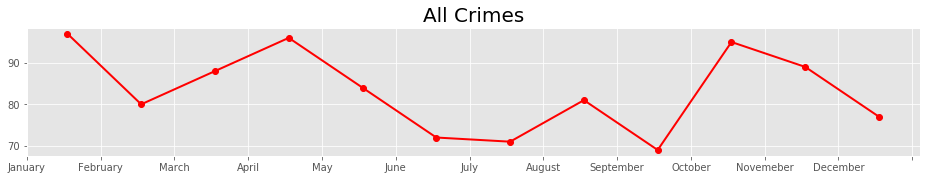

In [3]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

monthsIdx = data.groupby('Month').size().keys() - 1
monthsLit = ['January', 'February', 
             'March', 'April', 'May', 
             'June', 'July','August', 
             'September', 'October', 'Novemeber', 'December']
occursByMonth = data.groupby('Month').size().get_values()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(monthsIdx, occursByMonth, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))
ax1.set_xticklabels(monthsLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()


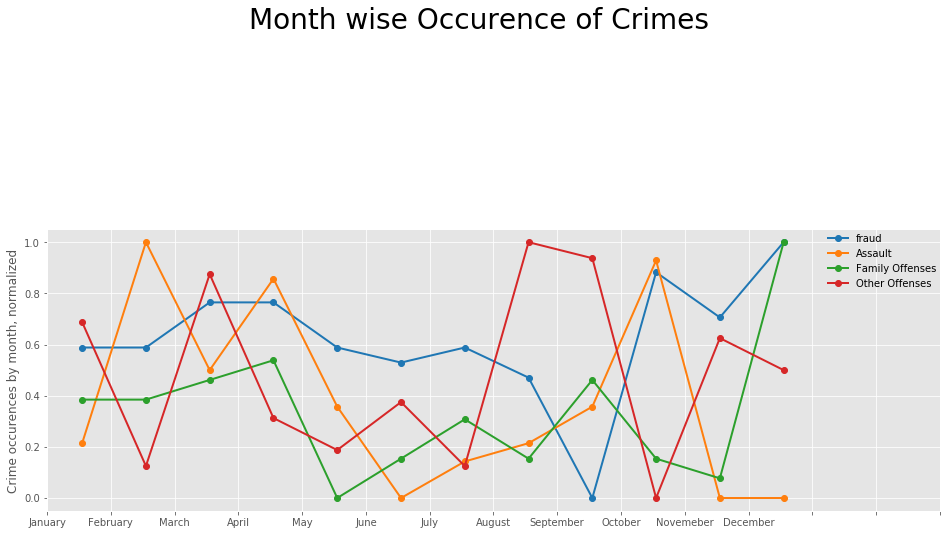

In [4]:
# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

y = np.empty([6,12])
y[0] = fraud.groupby('Month').size().get_values()
y[1] = assault.groupby('Month').size().get_values()
y[2] = FamilyOffenses.groupby('Month').size().get_values()
y[3] = OtherOffenses.groupby('Month').size().get_values()
#y[4] = vandalism.groupby('Month').size().get_values()


crimes = ['fraud', 'Assault', 'Family Offenses', 'Other Offenses']
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728']

for i in range(0,4):
    y[i]= (y[i]-min(y[i]))/(max(y[i])-min(y[i]))  # normalization
    h[i] = ax2.plot(monthsIdx, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by month, normalized")

ax2.xaxis.set_ticks(np.arange(start, end+2, 1))
ax2.set_xticklabels(monthsLit)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'Month wise Occurence of Crimes',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from datetime import datetime
import re 
from patsy import dmatrices
from sklearn.metrics import accuracy_score,classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss


#reading the training data set
SNF1 = pd.read_excel("C:\\Users\\rohit\\Downloads\\crime_and_day.xlsx")
SNF = SNF1.iloc[:, 0:7]
y = SNF1.iloc[:,7:9].values

In [6]:
SNF1.head()

,Dates,Descript,PdDistrict,Resolution,Address,X,Y,Category,DayOfWeek,xyz
0,2015-04-29 18:33:00,"AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE",BAYVIEW,"ARREST, BOOKED",3RD ST / 23RD ST,-122.388004,37.755390,1,Wednesday,1.0
1,2015-04-05 19:31:00,"AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE",MISSION,"ARREST, BOOKED",SOUTH VAN NESS AV / 14TH ST,-122.417803,37.768404,1,Sunday,NaN
2,2015-04-01 18:13:00,"AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE",MISSION,"ARREST, BOOKED",CAPP ST / 16TH ST,-122.418701,37.765110,1,Wednesday,NaN
3,2015-01-11 13:47:00,"AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE",RICHMOND,"ARREST, BOOKED",2600 Block of SACRAMENTO ST,-122.436523,37.789578,1,Sunday,NaN
4,2014-11-26 19:05:00,"AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE",MISSION,"ARREST, BOOKED",2900 Block of 16TH ST,-122.419213,37.765134,1,Wednesday,NaN


In [7]:
scaler = preprocessing.StandardScaler()
scaler.fit(SNF[["X","Y"]])
SNF[["X","Y"]] = scaler.transform(SNF[["X","Y"]])
SNF=SNF[abs(SNF["Y"])<100]
SNF.index=range(len(SNF))
print(SNF.index)

RangeIndex(start=0, stop=24160, step=1)


In [8]:
#feature normalization
def normalize(data): 
    data = (data - data.min()) / (data.max() - data.min())
    return data

In [9]:
SNF['X'] = normalize(SNF.X)
SNF['Y'] = normalize(SNF.Y)

In [10]:
print(SNF['X'])

0        0.842394
1        0.638787
2        0.632653
3        0.510885
4        0.629155
5        0.847651
6        0.725820
7        0.788798
8        0.636998
9        0.640699
10       0.463071
11       0.685761
12       0.726920
13       0.657872
14       0.684783
15       0.610311
16       0.618400
17       0.654875
18       0.698860
19       0.667293
20       0.754621
21       0.190470
22       0.643973
23       0.838600
24       0.693104
25       0.671613
26       0.737167
27       0.146827
28       0.304297
29       0.410351
           ...   
24130    0.315775
24131    0.616434
24132    0.539328
24133    0.555324
24134    0.555324
24135    0.589490
24136    0.524767
24137    0.719433
24138    0.493988
24139    0.713876
24140    0.437355
24141    0.208575
24142    0.540212
24143    0.605895
24144    0.607550
24145    0.995710
24146    0.652458
24147    0.759735
24148    0.845649
24149    0.757606
24150    0.706983
24151    0.766806
24152    0.470818
24153    0.548884
24154    0

In [11]:
def parse_time(x):
    DD=datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S")
    time=DD.hour
    day=DD.day
    month=DD.month
    year=DD.year
    return time, day, month, year

In [86]:
parse_time('1994-02-12 03:34:23')

(3, 12, 2, 1994)

In [12]:
#getting season : summer, fall, winter, spring from months column
def get_season(x):
    summer=0
    fall=0
    winter=0
    spring=0
    if (x in [5, 6, 7]):
        summer=1
    if (x in [8, 9, 10]):
        fall=1
    if (x in [11, 0, 1]):
        winter=1
    if (x in [2, 3, 4]):
        spring=1
    return summer, fall, winter, spring

#getting season : summer, fall, winter, spring from months column
def get_season(x):
    summer=0
    fall=0
    winter=0
    spring=0
    if (x in [5, 6, 7]):
        summer=1
    if (x in [8, 9, 10]):
        fall=1
    if (x in [11, 0, 1]):
        winter=1
    if (x in [2, 3, 4]):
        spring=1
    return summer, fall, winter, spring

def preprocess_data(df):
    
    feature_list=df.columns.tolist()
    
    if "Id" in feature_list:
        feature_list.remove("Id")
    if "Descript" in feature_list:
        feature_list.remove("Descript")
    if "Resolution" in feature_list:
        feature_list.remove("Resolution")
    cleanData=df[feature_list]
    cleanData.index=range(len(df))
    print ("Parsing dates...")
    cleanData["Time"], cleanData["Day"], cleanData["Month"], cleanData["Year"]=zip(*cleanData["Dates"].apply(parse_time))
    
    print ("Creating season features...")
    cleanData["Summer"], cleanData["Fall"], cleanData["Winter"], cleanData["Spring"]=zip(*cleanData["Month"].apply(get_season))
    print("Creating Lat/Long feature...")
    xy_scaler = preprocessing.StandardScaler()
    xy_scaler.fit(cleanData[["X","Y"]])
    cleanData[["X","Y"]] = xy_scaler.transform(cleanData[["X","Y"]])
    #set outliers to 0
    cleanData["X"]=cleanData["X"].apply(lambda x: 0 if abs(x)>5 else x)
    cleanData["Y"]=cleanData["Y"].apply(lambda y: 0 if abs(y)>5 else y)
    print ("Creating address features...")
    #recoding address as 0: if no interaction , 1: if interaction
    cleanData["Addr"]=cleanData["Address"].apply(lambda x: 1 if "/" in x else 0)
    print ("Creating dummy variables...")
    PD = pd.get_dummies(cleanData['PdDistrict'], prefix='PD')
    #DAYOfWeek = pd.get_dummies(cleanData["DayOfWeek"], prefix='WEEK')
    TIME = pd.get_dummies(cleanData['Time'],prefix='HOUR')
    Day = pd.get_dummies(cleanData['Day'],prefix='DAY')
    Month = pd.get_dummies(cleanData['Month'],prefix='MONTH')
    Year = pd.get_dummies(cleanData['Year'],prefix='YEAR')
    
    feature_list=cleanData.columns.tolist()
    
    print ("Joining features...")
    features = pd.concat([cleanData[feature_list],PD,TIME,Day,Month,Year],axis=1)
    
    print ("Droping processed columns...")
    cleanFeatures=features.drop(["PdDistrict","Address","Dates","Time","Day","Month","Year"],\
                                axis=1,inplace=False)
    
    print('Done!')
    
    return cleanFeatures

features = preprocess_data(SNF)

Parsing dates...


C:\Users\rohit\Anaconda3\envs\tfp3.6\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Creating season features...
Creating Lat/Long feature...
Creating address features...
Creating dummy variables...
Joining features...
Droping processed columns...
Done!


In [13]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y[:, 1] = labelencoder.fit_transform(y[:,1])

In [14]:
onehotencoder = OneHotEncoder(categorical_features = [0])

In [98]:
y = pd.DataFrame(y)
y.drop(y.tail(1).index,inplace=True) 
print(y)

       0  1
0      1  6
1      1  3
2      1  6
3      1  3
4      1  6
5      1  5
6      1  2
7      1  6
8      1  4
9      1  6
10     1  5
11     1  4
12     1  4
13     1  3
14     1  3
15     1  4
16     1  6
17     1  5
18     1  1
19     1  2
20     1  1
21     1  0
22     1  4
23     1  5
24     1  1
25     1  4
26     1  0
27     1  0
28     1  6
29     1  5
...   .. ..
24130  0  2
24131  0  2
24132  0  2
24133  0  3
24134  0  3
24135  0  3
24136  0  3
24137  0  3
24138  0  3
24139  0  3
24140  0  3
24141  0  3
24142  0  1
24143  0  1
24144  0  1
24145  0  1
24146  0  1
24147  0  1
24148  0  1
24149  0  1
24150  0  1
24151  0  1
24152  0  1
24153  0  1
24154  0  1
24155  0  1
24156  0  1
24157  0  1
24158  0  1
24159  0  1

[24160 rows x 2 columns]


In [146]:
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(features, test_size = 0.3)
# y1_train, y1_test = train_test_split(y,test_size = 0.3)

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(features, y, test_size = 0.3, random_state = 0)

In [147]:
xTrain.head(5)

,X,Y,Summer,Fall,Winter,Spring,Addr,PD_BAYVIEW,PD_CENTRAL,PD_INGLESIDE,...,YEAR_2006,YEAR_2007,YEAR_2008,YEAR_2009,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015
17649,0.297624,1.538932,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7551,0.502205,0.320110,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10757,1.129429,1.098762,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14316,0.332818,0.157489,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20722,0.811234,0.041810,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [148]:
yTrain.head(5)

,0,1
17649,0,6
7551,1,0
10757,1,0
14316,1,6
20722,0,3


In [149]:
yTest.head(5)

,0,1
20537,0,0
14679,1,0
22401,0,5
4672,1,6
4664,1,6


In [150]:
xTest.head(5)

,X,Y,Summer,Fall,Winter,Spring,Addr,PD_BAYVIEW,PD_CENTRAL,PD_INGLESIDE,...,YEAR_2006,YEAR_2007,YEAR_2008,YEAR_2009,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015
20537,1.670638,-1.141396,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
14679,0.496907,1.071249,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22401,-0.105541,1.231561,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4672,0.143894,-0.623157,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4664,0.541599,0.738756,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [117]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =50, kernel_initializer = 'uniform', activation = 'relu', input_dim = 97))

# Adding the second hidden layer clos
classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [169]:
# Fitting the ANN to the Training set
# y1_test = y1_test.drop([10779])
history = classifier.fit(xTrain, yTrain, batch_size = 10, epochs = 50)
y_pred = classifier.predict(xTest)
y_pred_ac = (y_pred > 0.3)

Epoch 1/50
16912/16912 [==============================] - 5s 301us/step - loss: 1.2385 - acc: 0.8952
Epoch 2/50
16912/16912 [==============================] - 6s 327us/step - loss: 1.2387 - acc: 0.8949
Epoch 3/50
16912/16912 [==============================] - 4s 230us/step - loss: 1.2387 - acc: 0.8949
Epoch 4/50
16912/16912 [==============================] - 4s 229us/step - loss: 1.2387 - acc: 0.8944
Epoch 5/50
16912/16912 [==============================] - 4s 251us/step - loss: 1.2385 - acc: 0.8962
Epoch 6/50
16912/16912 [==============================] - 5s 285us/step - loss: 1.2385 - acc: 0.8961
Epoch 7/50
16912/16912 [==============================] - 7s 400us/step - loss: 1.2384 - acc: 0.8959
Epoch 8/50
16912/16912 [==============================] - 5s 291us/step - loss: 1.2384 - acc: 0.8949
Epoch 9/50
16912/16912 [==============================] - 6s 331us/step - loss: 1.2384 - acc: 0.8963
Epoch 10/50
16912/16912 [==============================] - 4s 257us/step - loss: 1.2383 - a

dict_keys(['loss', 'acc'])


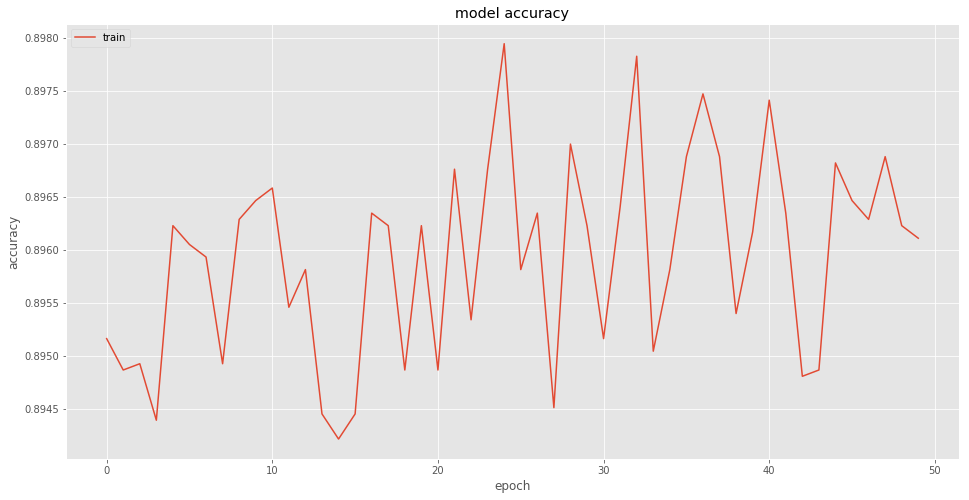

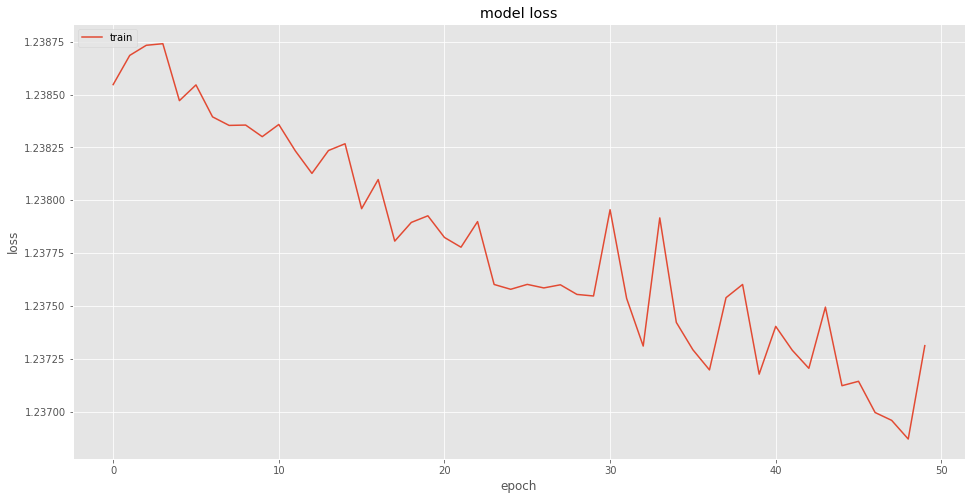

In [172]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [244]:
res = classifier.predict(xTest.head(20))
res = (res > 0.1)
dataset = pd.DataFrame({'Prediction':res[:,0]})
dataset = dataset*1
dataset

,Prediction
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,0
8,0
9,1


In [245]:
res = pd.DataFrame({'Actual':yTest[0][:20]})
res.index = range(20)

Text(0.5, 1.0, 'Actual')

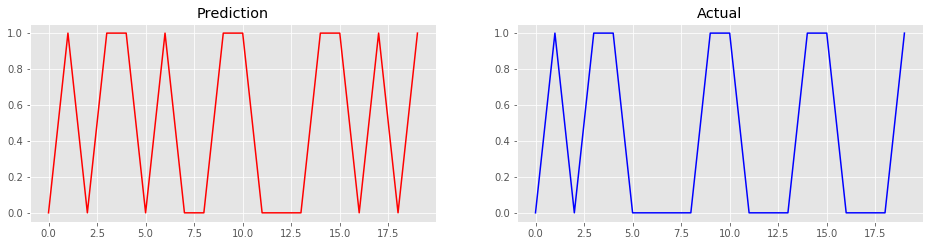

In [246]:

plt.figure()
plt.subplot(2,2,1)
plt.plot(dataset,'r')
plt.title('Prediction')

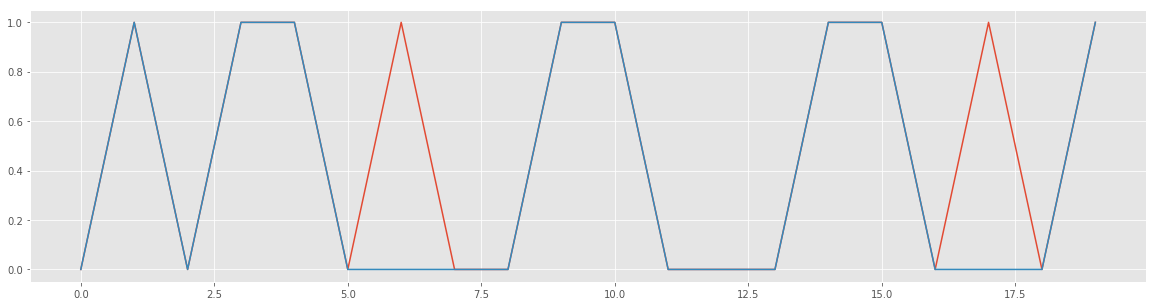

In [251]:
plt.figure(figsize=(20,5))

plt.plot(dataset, label='pred')
plt.plot(res, label='true')

plt.show()